# Useful libraries

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import data and pre-processing

In [10]:
df.dropna()

,avg_5_10,avg_5_30,std_5_10,std_5_30,mkt_cap,roe,op_margin,net_margin,debt_ratio,20_day_pct_ret
0,0.264394,0.723280,0.005009,-0.109533,1.475607e+09,-2.423652,-2.469243,-2.526091,1.331458,2.666667
1,0.370303,0.369892,-0.168146,-0.197195,4.356451e+08,0.008398,0.067019,0.010490,2.183010,-28.118609
2,-0.297576,-1.400215,-0.212675,-0.971217,2.858325e+09,0.086178,0.139470,0.117756,4.385141,3.709428
3,0.291818,0.733871,-0.396335,-0.382197,1.283978e+09,1.018970,0.398417,0.325227,1.151618,2.302632
4,13.045455,39.500000,-2.882373,-11.948936,4.351435e+08,-0.243362,-3.540007,-3.924143,1.747271,-2.736842
...,...,...,...,...,...,...,...,...,...,...
3182,-1.012121,-2.636022,-0.343216,-0.690639,2.646635e+11,-0.008802,0.000000,-0.041344,2.159854,1.198466
3181,0.102576,-0.126059,0.217200,0.420457,2.749799e+07,0.072277,0.302059,0.229041,1.981508,-22.255193
3180,-0.014545,0.215774,-0.072718,-0.324558,1.212153e+08,-0.356870,0.000000,0.000000,4.757711,-31.979695
3183,-0.173788,-0.527688,-0.026306,0.010328,3.983095e+09,-0.110565,-1.677301,-1.674281,2.241927,-7.562500


In [24]:
df = pd.read_csv('ncars_and_fin_data.csv')
df = df.sort_values(by='date')
df = df.iloc[:,6:]
df.dropna(inplace=True)

# Mean of quintiles

In [67]:
df['quintile'] = pd.qcut(df['20_day_pct_ret'], 5, labels=False)
mean_per_quintile = df.groupby('quintile')['20_day_pct_ret'].mean()
count_per_quintile = df.groupby('quintile').count()

In [69]:
count_per_quintile

,avg_5_10,avg_5_30,std_5_10,std_5_30,mkt_cap,roe,op_margin,net_margin,debt_ratio,20_day_pct_ret
quintile,,,,,,,,,,
0,637,637,637,637,637,637,637,637,637,637
1,637,637,637,637,637,637,637,637,637,637
2,636,636,636,636,636,636,636,636,636,636
3,636,636,636,636,636,636,636,636,636,636
4,637,637,637,637,637,637,637,637,637,637


# Logistic Regression

In [56]:
# Divide the target variable into quintiles
target_quintiles = pd.qcut(df.iloc[:,-1], 5, labels=False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], target_quintiles, test_size=0.2, shuffle=False)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
training_accuracy = accuracy_score(y_train, model.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Training Accuracy: {training_accuracy}")
print(f"Model Testing Accuracy: {testing_accuracy}")

Model Training Accuracy: 0.21170463472113119
Model Testing Accuracy: 0.152276295133438


# XGBoost

In [58]:
target_quintiles = pd.qcut(df.iloc[:,-1], 5, labels=False)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], target_quintiles, test_size=0.2, shuffle=False)

# Create the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate and print the accuracy
training_accuracy = accuracy_score(y_train, model.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Training Accuracy: {training_accuracy}")
print(f"Model Testing Accuracy: {testing_accuracy}")

Model Training Accuracy: 0.21170463472113119
Model Testing Accuracy: 0.27629513343799056


# Trading Strategy

In [60]:
predicted_labels = y_pred # depends on what you ran last between XGBoost or Logistic
returns = df.iloc[-len(y_pred):,-1]
positions = []
for prediction in predicted_labels:
    if prediction in [0,1]:
        positions.append(-1)
    elif prediction in [3,4]:
        positions.append(1)
    else:
        positions.append(0)
        
sum(np.array(positions)*np.array(returns))

2547.1104307203505

In [70]:
df

,avg_5_10,avg_5_30,std_5_10,std_5_30,mkt_cap,roe,op_margin,net_margin,debt_ratio,20_day_pct_ret,quintile
0,0.264394,0.723280,0.005009,-0.109533,1.475607e+09,-2.423652,-2.469243,-2.526091,1.331458,2.666667,3
1,0.370303,0.369892,-0.168146,-0.197195,4.356451e+08,0.008398,0.067019,0.010490,2.183010,-28.118609,0
2,-0.297576,-1.400215,-0.212675,-0.971217,2.858325e+09,0.086178,0.139470,0.117756,4.385141,3.709428,3
3,0.291818,0.733871,-0.396335,-0.382197,1.283978e+09,1.018970,0.398417,0.325227,1.151618,2.302632,3
4,13.045455,39.500000,-2.882373,-11.948936,4.351435e+08,-0.243362,-3.540007,-3.924143,1.747271,-2.736842,2
...,...,...,...,...,...,...,...,...,...,...,...
3182,-1.012121,-2.636022,-0.343216,-0.690639,2.646635e+11,-0.008802,0.000000,-0.041344,2.159854,1.198466,3
3181,0.102576,-0.126059,0.217200,0.420457,2.749799e+07,0.072277,0.302059,0.229041,1.981508,-22.255193,0
3180,-0.014545,0.215774,-0.072718,-0.324558,1.212153e+08,-0.356870,0.000000,0.000000,4.757711,-31.979695,0
3183,-0.173788,-0.527688,-0.026306,0.010328,3.983095e+09,-0.110565,-1.677301,-1.674281,2.241927,-7.562500,1


# Histogram of correct labels

<ipython-input-80-fe3b3c3b9a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['predicted_labels'] = predicted_labels
<ipython-input-80-fe3b3c3b9a6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['correct'] = df_new['quintile'] == df_new['predicted_labels']


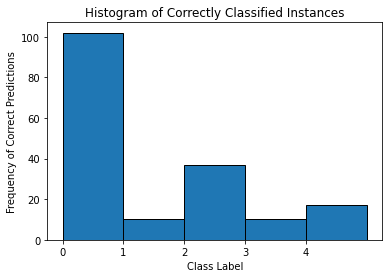

In [80]:
df_new = df.iloc[-len(predicted_labels):,:]

df_new['predicted_labels'] = predicted_labels
df_new['correct'] = df_new['quintile'] == df_new['predicted_labels']

# Filter for correct predictions
correct_predictions = df_new[df_new['correct']==True]['quintile']

# Plotting the histogram
# Assuming you want to plot the histogram based on the actual labels
plt.hist(correct_predictions, bins=range(len(set(df_new['quintile']))+1), edgecolor='black')
plt.xlabel('Class Label')
plt.ylabel('Frequency of Correct Predictions')
plt.title('Histogram of Correctly Classified Instances')
plt.xticks(range(len(set(df_new['quintile']))))
plt.show()
